original circuit:
        ┌───┐               
q_0: |0>┤ H ├──■─────────■──
        ├───┤┌─┴─┐     ┌─┴─┐
q_1: |0>┤ T ├┤ X ├──■──┤ X ├
        └───┘└───┘┌─┴─┐├───┤
q_2: |0>──────────┤ X ├┤ Y ├
                  └───┘└───┘
----------------------------------------------------------------------------------------------------
Qubit(QuantumRegister(3, 'q'), 0) [Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(2, 'cutQ'), 0)]
Qubit(QuantumRegister(3, 'q'), 1) [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(2, 'cutQ'), 1)]
Qubit(QuantumRegister(3, 'q'), 2) [Qubit(QuantumRegister(3, 'q'), 2)]


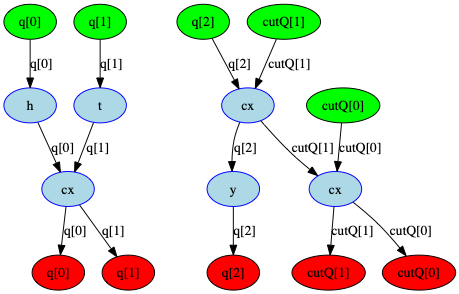

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.tools.visualization import dag_drawer
import cutter

q = QuantumRegister(3,'q')
original_circ = QuantumCircuit(q)
original_circ.h(0)
original_circ.t(1)
original_circ.cx(0,1)
original_circ.cx(1,2)
original_circ.cx(0,1)
original_circ.y(2)
print('original circuit:')
print(original_circ)
print('-'*100)

original_dag = circuit_to_dag(original_circ)
positions = [(q[0],1),(q[1],1)]
cut_dag, path_map = cutter.cut_edges(original_dag=original_dag, positions=positions)

[print(x,path_map[x]) for x in path_map]
dag_drawer(cut_dag)

In [2]:
fragments, fragment_qubits = cutter.fragments_generator(cut_dag, path_map)

component 0
in q[0] q
does not have q, add QuantumRegister(1, 'q')
in q[1] q
has q, changed from QuantumRegister(1, 'q') to QuantumRegister(2, 'q')
registers: {'q': QuantumRegister(2, 'q')}
qubits: {Qubit(QuantumRegister(3, 'q'), 0): Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1): Qubit(QuantumRegister(2, 'q'), 1)}
        ┌───┐     
q_0: |0>┤ H ├──■──
        ├───┤┌─┴─┐
q_1: |0>┤ T ├┤ X ├
        └───┘└───┘
****************************************************************************************************
component 1
in q[2] q
does not have q, add QuantumRegister(1, 'q')
in cutQ[1] cutQ
does not have cutQ, add QuantumRegister(1, 'cutQ')
in cutQ[0] cutQ
has cutQ, changed from QuantumRegister(1, 'cutQ') to QuantumRegister(2, 'cutQ')
registers: {'q': QuantumRegister(1, 'q'), 'cutQ': QuantumRegister(2, 'cutQ')}
qubits: {Qubit(QuantumRegister(3, 'q'), 2): Qubit(QuantumRegister(1, 'q'), 0), Qubit(QuantumRegister(2, 'cutQ'), 1): Qubit(QuantumRegister(2, 'cutQ'), 0), Qu